In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
# 데이터프레임으로 만들기
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# 데이터 세트 target배열은 주택 가격 -> 데이터프레임에 'price'컬럼 새롭게 생성
boston_df['price'] = boston.target
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [4]:
boston_df.info()
# 널 값 없음, 모두 float 형태임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

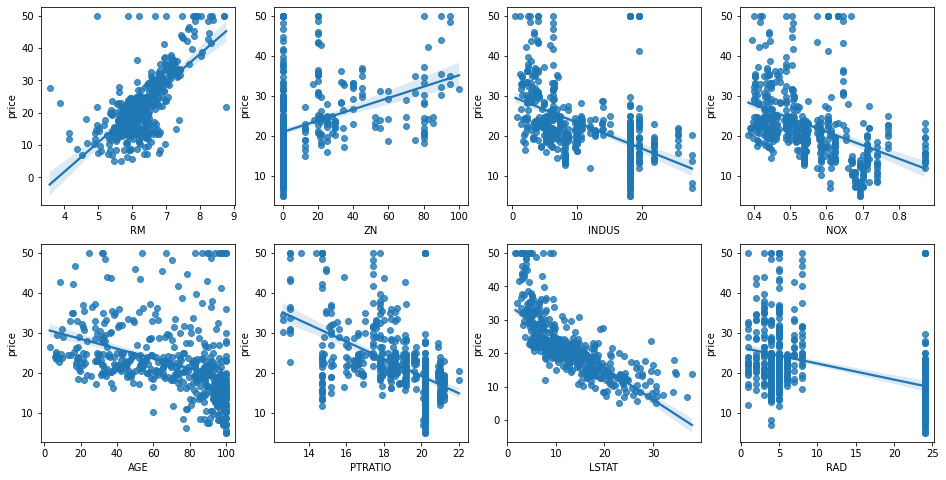

In [7]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2) # 2행 4열
# plt.subplots 여러 개의 그래프를 한번에 표현하기 위해 사용
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
    # i 인덱스 값, feature 컬럼 이름 리턴
    row = int(i/4) # 0~3은 0 4~7은 1이 나옴
    col = i % 4 # 4로 나누었을 때의 나머지 구하기 i=0일때 0, i=3일때 3 ->01230123
    sns.regplot(x=feature,y='price',data=boston_df,ax=axs[row][col])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
X_train,X_test,y_train,y_test = train_test_split(boston.data,
                                                 boston.target,
                                                 test_size=0.3,
                                                 random_state=156)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred =lr.predict(X_test)
mse = mean_squared_error(y_test,pred) # 예측값과 실제값의 차이를 제곱해 평균값 계산
rmse = np.sqrt(mse) # mse에 루트를 씌운 것
r2 = r2_score(y_test,pred) # 예측값 분산 / 실제값 분산
print(mse,rmse,r2)

17.296915907902083 4.158956107955707 0.7572263323138931


In [16]:
# 회귀계수와 바이어스 값
# 변수 각각의 가중치 값(회귀계수)
np.round(lr.coef_,1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [17]:
# 절편(버이어스)
lr.intercept_ 

40.99559517216417